In [ ]:
! pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 50.7 MB/s eta 0:00:00


In [1]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.Resize((256, 256)), 
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataSet = torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train', transform=transform) 

train_dataset_loader = torch.utils.data.DataLoader(
    train_dataSet, batch_size=4, shuffle=True, num_workers=2 
)

know bands of image

In [ ]:
import rasterio

# Open the image
with rasterio.open('image.jpg') as src:
    # Get the band indexes
    band_indexes = src.indexes
    print(band_indexes)

(1, 2, 3)


Since they are just RGB images then we can use proxy instead of the specific bands used for the indeces

 Normalized Difference Water Index

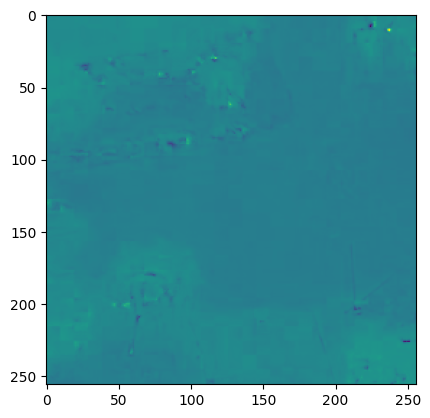

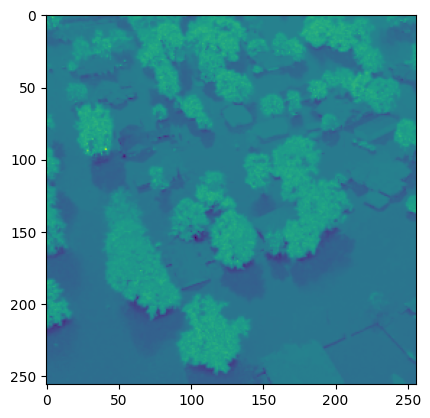

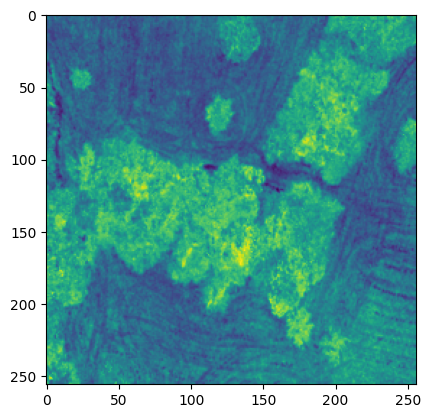

The difference in mean NDWI between flooded and non-flooded images is 0.18941906094551086
The difference in mean NDWI between 2 flooded images is 0.05571865662932396


In [ ]:
import numpy as np

def calculate_ndwi(image_path):

    # read the image 
    img = io.imread(image_path)

    # Convert the image to float64 data type
    img = img_as_ubyte(img)

    # Calculate the NDWI
    green = img[:, :, 1].astype('float64')
    blue = img[:, :, 2].astype('float64')

    # np.seterr(divide='ignore', invalid='ignore')
    ndwi = np.divide(np.subtract(green, blue), np.add(green, blue))

    # print all the values form ndwi
    list_ndwi = []
    for i in range(len(ndwi)):
        for j in range(len(ndwi[i])):
            print(ndwi[i][j])
            list_ndwi.append(ndwi[i][j])


    return ndwi

# Flooded
# Load the image
img_flooded = '/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train_eq/flooded/8.jpg'
ndwi_flooded = calculate_ndwi(img_flooded)

# Visualize the NDWI use matplotlib

plt.imshow(ndwi, cmap='RdYlGn')
plt.colorbar()
plt.show()


# Load the image
img_flooded1 = '/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train_eq/flooded/0.jpg'
ndwi_flooded1 = calculate_ndwi(img_flooded1)

# Visualize the NDWI
show(ndwi_flooded1)

# Non-Flooded
# Load the image
img_non_flooded = '/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train_eq/non-flooded/603.jpg'
ndwi_non_flooded = calculate_ndwi(img_non_flooded)

# Visualize the NDWI
show(ndwi_non_flooded)

# Calculate the difference in mean NDWI between the flooded and non-flooded images
ndwi_diff = np.abs(np.mean(ndwi_flooded) - np.mean(ndwi_non_flooded))
print(f"The difference in mean NDWI between flooded and non-flooded images is {ndwi_diff}")

# differece betwee 2 flooded
ndwi_diff1 = np.abs(np.mean(ndwi_flooded1) - np.mean(ndwi_flooded))
print(f"The difference in mean NDWI between 2 flooded images is {ndwi_diff1}")



Normalized Difference Vegetation Index

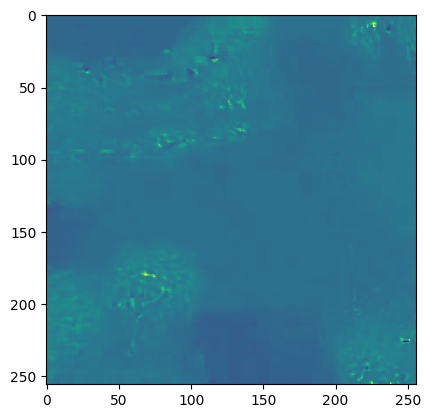

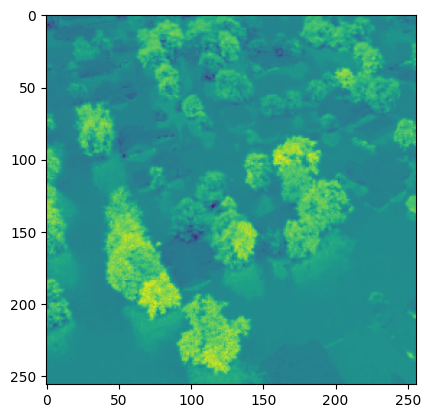

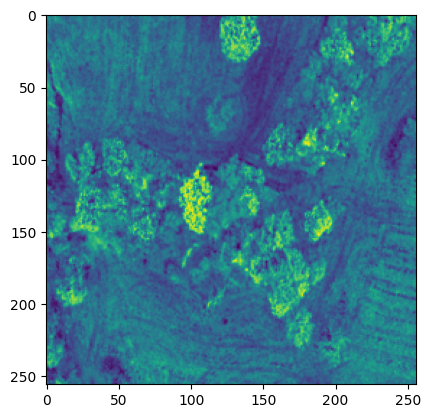

The difference in mean NDVI between flooded and non-flooded images is 0.19880658388137817
The difference in mean NDVI between 2 flooded images is 0.009108707308769226


In [ ]:
from skimage import io, color, img_as_ubyte
import numpy as np

def calculate_ndvi(image_path):

    # read the image
    img = io.imread(image_path)

    # Convert the image to float64 data type
    img = img_as_ubyte(img)

    # Calculate the NDVI
    # Extract the Red and NIR bands
    red = img[:, :, 0].astype('float64')
    nir = img[:, :, 1].astype('float64')
    ndvi = np.divide(np.subtract(nir, red), np.add(nir, red))

    return ndvi

# Flooded
# Load the image
img_flooded = '/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train_eq/flooded/8.jpg'
ndvi_flooded = calculate_ndvi(img_flooded)

# Visualize the NDVI
show(ndvi_flooded)

# Load the image
img_flooded1 = '/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train_eq/flooded/0.jpg'
ndvi_flooded1 = calculate_ndvi(img_flooded1)

# Visualize the NDVI
show(ndvi_flooded1)

# Non-Flooded
# Load the image
img_non_flooded = '/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train_eq/non-flooded/603.jpg'
ndvi_non_flooded = calculate_ndvi(img_non_flooded)

# Visualize the NDVI
show(ndvi_non_flooded)

# Calculate the difference in mean NDVI between the flooded and non-flooded images
ndvi_diff = np.abs(np.mean(ndvi_flooded) - np.mean(ndvi_non_flooded))
print(f"The difference in mean NDVI between flooded and non-flooded images is {ndvi_diff}")

# differece betwee 2 flooded
ndvi_diff1 = np.abs(np.mean(ndvi_flooded) - np.mean(ndvi_flooded1))
print(f"The difference in mean NDVI between 2 flooded images is {ndvi_diff1}")

Color features:
* color averaging
* color varience
* color histogram

***Color varience significintaly differs between flooded and non-flooded images.***

***Difference in blue color value between 2 flooded image is too small, while this difference between flood and non-flooded images is large.***

one image

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the flooded image
img_flooded = '/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train_eq/flooded/8.jpg'
img_flooded = Image.open(img_flooded)

# Convert the image to a numpy array
img_arr_flooded = np.array(img_flooded)

# Extract the average color
avg_color_flooded = np.mean(img_arr_flooded, axis=(0, 1))
# print('Average color flooded:', avg_color_flooded)

# Extract the color variance
color_var_flooded = np.var(img_arr_flooded, axis=(0, 1))
# print('Color variance flooded:', color_var_flooded)

# Extract the color histogram
hist, bins = np.histogramdd(img_arr_flooded.reshape(-1, 3), bins=256, range=((0, 255), (0, 255), (0, 255)))
hist_norm_flooded = hist / np.sum(hist)
# print('Color histogram flooded:', hist_norm_flooded.flatten())

# Load another flooded image
img_flooded1 = '/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train_eq/flooded/0.jpg'
img_flooded1 = Image.open(img_flooded1)

# Convert the image to a numpy array
img_arr_flooded1 = np.array(img_flooded1)

# Extract the average color
avg_color_flooded1 = np.mean(img_arr_flooded1, axis=(0, 1))
# print('Average color flooded1:', avg_color_flooded1)

# Extract the color variance
color_var_flooded1 = np.var(img_arr_flooded1, axis=(0, 1))
# print('Color variance flooded1:', color_var_flooded1)

# Extract the color histogram
hist, bins = np.histogramdd(img_arr_flooded1.reshape(-1, 3), bins=256, range=((0, 255), (0, 255), (0, 255)))
hist_norm_flooded1 = hist / np.sum(hist)
# print('Color histogram flooded1:', hist_norm_flooded1.flatten())

# Load the non-flooded image
img_nonflooded = '/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train_eq/non-flooded/580.jpg'
img_nonflooded = Image.open(img_nonflooded)

# Convert the image to a numpy array
img_arr_nonflooded = np.array(img_nonflooded)

# Extract the average color
avg_color_nonflooded = np.mean(img_arr_nonflooded, axis=(0, 1))
# print('Average color non-flooded:', avg_color_nonflooded)

# Extract the color variance
color_var_nonflooded = np.var(img_arr_nonflooded, axis=(0, 1))
# print('Color variance non-flooded:', color_var_nonflooded)

# Extract the color histogram
hist, bins = np.histogramdd(img_arr_nonflooded.reshape(-1, 3), bins=256, range=((0, 255), (0, 255), (0, 255)))
hist_norm_nonflooded = hist / np.sum(hist)
# print('Color histogram non-flooded:', hist_norm_nonflooded.flatten())

# Calculate the difference in mean color between the flooded and non-flooded images
color_diff = np.abs(np.mean(avg_color_flooded) - np.mean(avg_color_nonflooded))
# print(f"The difference in mean color between flooded and non-flooded images is {color_diff}")

# Calculate the difference in color variance between the flooded and non-flooded images
color_var_diff = np.abs(np.mean(color_var_flooded) - np.mean(color_var_nonflooded))
# print(f"The difference in color variance between flooded and non-flooded images is {color_var_diff}")

# Calculate the difference in color histogram between the flooded and non-flooded images
color_hist_diff = np.abs(np.mean(hist_norm_flooded) - np.mean(hist_norm_nonflooded))
# print(f"The difference in color histogram between flooded and non-flooded images is {color_hist_diff}")

# Calculate the difference in color between the flooded and non-flooded images in each channel
color_diff_r = np.abs(np.mean(avg_color_flooded[0]) - np.mean(avg_color_nonflooded[0]))
color_diff_g = np.abs(np.mean(avg_color_flooded[1]) - np.mean(avg_color_nonflooded[1]))
color_diff_b = np.abs(np.mean(avg_color_flooded[2]) - np.mean(avg_color_nonflooded[2]))
# print(f"The difference in mean color between flooded and non-flooded images in the red channel is {color_diff_r}")
# print(f"The difference in mean color between flooded and non-flooded images in the green channel is {color_diff_g}")
print(f"The difference in mean color between flooded and non-flooded images in the blue channel is {color_diff_b}")

# Calculate the difference in color variance between the flooded and non-flooded images in each channel
color_var_diff_r = np.abs(np.mean(color_var_flooded[0]) - np.mean(color_var_nonflooded[0]))
color_var_diff_g = np.abs(np.mean(color_var_flooded[1]) - np.mean(color_var_nonflooded[1]))
color_var_diff_b = np.abs(np.mean(color_var_flooded[2]) - np.mean(color_var_nonflooded[2]))
# print(f"The difference in color variance between flooded and non-flooded images in the red channel is {color_var_diff_r}")
# print(f"The difference in color variance between flooded and non-flooded images in the green channel is {color_var_diff_g}")
print(f"The difference in color variance between flooded and non-flooded images in the blue channel is {color_var_diff_b}")

# Calculate the difference in color histogram between the flooded and non-flooded images in each channel
color_hist_diff_r = np.abs(np.mean(hist_norm_flooded[0]) - np.mean(hist_norm_nonflooded[0]))
color_hist_diff_g = np.abs(np.mean(hist_norm_flooded[1]) - np.mean(hist_norm_nonflooded[1]))
color_hist_diff_b = np.abs(np.mean(hist_norm_flooded[2]) - np.mean(hist_norm_nonflooded[2]))
# print(f"The difference in color histogram between flooded and non-flooded images in the red channel is {color_hist_diff_r}")
# print(f"The difference in color histogram between flooded and non-flooded images in the green channel is {color_hist_diff_g}")
# print(f"The difference in color histogram between flooded and non-flooded images in the blue channel is {color_hist_diff_b}")

# Calculate the difference in color between the 2 flooded images in each channel
color_diff_r = np.abs(np.mean(avg_color_flooded[0]) - np.mean(avg_color_flooded1[0]))
color_diff_g = np.abs(np.mean(avg_color_flooded[1]) - np.mean(avg_color_flooded1[1]))
color_diff_b = np.abs(np.mean(avg_color_flooded[2]) - np.mean(avg_color_flooded1[2]))
# print(f"The difference in mean color between the 2 flooded images in the red channel is {color_diff_r}")
# print(f"The difference in mean color between the 2 flooded images in the green channel is {color_diff_g}")
print(f"The difference in mean color between the 2 flooded images in the blue channel is {color_diff_b}")

# Calculate the difference in color variance between the 2 flooded images in each channel
color_var_diff_r = np.abs(np.mean(color_var_flooded[0]) - np.mean(color_var_flooded1[0]))
color_var_diff_g = np.abs(np.mean(color_var_flooded[1]) - np.mean(color_var_flooded1[1]))
color_var_diff_b = np.abs(np.mean(color_var_flooded[2]) - np.mean(color_var_flooded1[2]))
# print(f"The difference in color variance between the 2 flooded images in the red channel is {color_var_diff_r}")
# print(f"The difference in color variance between the 2 flooded images in the green channel is {color_var_diff_g}")
print(f"The difference in color variance between the 2 flooded images in the blue channel is {color_var_diff_b}")

# Calculate the difference in color histogram between the 2 flooded images in each channel
color_hist_diff_r = np.abs(np.mean(hist_norm_flooded[0]) - np.mean(hist_norm_flooded1[0]))
color_hist_diff_g = np.abs(np.mean(hist_norm_flooded[1]) - np.mean(hist_norm_flooded1[1]))
color_hist_diff_b = np.abs(np.mean(hist_norm_flooded[2]) - np.mean(hist_norm_flooded1[2]))
# print(f"The difference in color histogram between the 2 flooded images in the red channel is {color_hist_diff_r}")
# print(f"The difference in color histogram between the 2 flooded images in the green channel is {color_hist_diff_g}")
# print(f"The difference in color histogram between the 2 flooded images in the blue channel is {color_hist_diff_b}")


The difference in mean color between flooded and non-flooded images in the blue channel is 9.356713619725781
The difference in color variance between flooded and non-flooded images in the blue channel is 2318.8324618520296
The difference in mean color between the 2 flooded images in the blue channel is 0.7572478863561116
The difference in color variance between the 2 flooded images in the blue channel is 2810.911136979508


all images

In [ ]:
import os
from PIL import Image
import numpy as np

# Define the path to the dataset
data_dir = '/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train/flooded/'

# Initialize lists to store the color features for each image
avg_colors = []
color_vars = []
color_hists = []

# Iterate over the images in the dataset
for filename in os.listdir(data_dir):
    # Load the image
    img = Image.open(os.path.join(data_dir, filename))

    # Convert the image to a numpy array
    img_arr = np.array(img)

    # Extract the average color
    avg_color = np.mean(img_arr, axis=(0, 1))
    avg_colors.append(avg_color)

    # Extract the color variance
    color_var = np.var(img_arr, axis=(0, 1))
    color_vars.append(color_var)

    # Extract the color histogram
    hist, bins = np.histogramdd(img_arr.reshape(-1, 3), bins=256, range=((0, 255), (0, 255), (0, 255)))
    hist_norm = hist / np.sum(hist)
    color_hists.append(hist_norm.flatten())

# Convert the lists to numpy arrays
avg_colors = np.array(avg_colors)
color_vars = np.array(color_vars)
color_hists = np.array(color_hists)

Extract texture features:
* texture gradient
* texture energy
* texture correlation
* texture homogenity

***texture energy and texture homogenity have slight difference with 2 flooded images, while it differs with the flooded and non-flooded images***



In [ ]:
from skimage.feature import graycomatrix, graycoprops
from skimage import io, color, img_as_ubyte
import numpy as np

def texture_feature(img):
    # Convert the image to grayscale
    img_gray = color.rgb2gray(img)

    # Convert the image to uint8
    img_gray = img_as_ubyte(img_gray)

    # Calculate the texture gradient
    texture_gradient = np.mean(np.gradient(img_gray)[0])
    # texture_gradients.append(texture_gradient)

    # Calculate the texture energy
    texture_energy = np.mean(graycoprops(graycomatrix(img_gray, distances=[1], angles=[0], levels=256), 'energy'))
    # texture_energies.append(texture_energy)

    # Calculate the texture correlation
    texture_correlation = np.mean(
        graycoprops(graycomatrix(img_gray, distances=[1], angles=[0], levels=256), 'correlation'))
    # texture_correlations.append(texture_correlation)

    # Calculate the texture homogeneity
    texture_homogeneity = np.mean(
        graycoprops(graycomatrix(img_gray, distances=[1], angles=[0], levels=256), 'homogeneity'))
    # texture_homogeneity.append(texture_homogeneity)

    print('texture_gradient', texture_gradient)
    print('texture_energy', texture_energy)
    print('texture_correlation', texture_correlation)
    print('texture_homogeneity', texture_homogeneity)
    print('---------------')

img_flooded = io.imread('/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train_eq/flooded/0.jpg')
texture_feature(img_flooded)
img_flooded1 = io.imread('/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train_eq/flooded/39.jpg')
texture_feature(img_flooded1)
img_nonflooded = io.imread('/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train_eq/non-flooded/580.jpg')
texture_feature(img_nonflooded)


texture_gradient 0.01269605696933943
texture_energy 0.014078983428792368
texture_correlation 0.9502755745025842
texture_homogeneity 0.2045911136472592
---------------
texture_gradient -0.17452382237090594
texture_energy 0.029729483695791915
texture_correlation 0.9666145136140284
texture_homogeneity 0.37661055092613416
---------------
texture_gradient -0.05568629627573958
texture_energy 0.006989190897927763
texture_correlation 0.8612979513253012
texture_homogeneity 0.05806650281908388
---------------


Extract shape features:
* area
* perimeter
* compactness
* eccentricity.

--> summation compactness and summation of eccentricity have significant difference between flooded and non-flooded, while 2 flooded have no difference


In [2]:
# extract shape features the area, perimeter, compactness, or eccentricity.
from skimage import io, color, img_as_ubyte
from skimage.measure import regionprops
import numpy as np

def shape_feature(img_flooded):

    # Load the flooded image
    img_flooded = io.imread(img_flooded)

    # Convert the image to grayscale
    img_flooded_gray = color.rgb2gray(img_flooded)

    # Convert the image to uint8
    img_flooded_gray = img_as_ubyte(img_flooded_gray)

    # Extract the regionprops
    region_props = regionprops(img_flooded_gray)

    # print number of regions
    print('The number of regions is: ', len(region_props))

    # Print the summation area of the all regions
    print('The summation area of the all regions is: ', np.sum([region.area for region in region_props]))

    # Print the summation perimeter of all regions
    print('The summation perimeter of all regions is: ', np.sum([region.perimeter for region in region_props]))

    # Print the summation compactness of all regions
    print('The summation compactness of all regions is: ', np.sum([region.perimeter ** 2 / region.area for region in region_props]))

    # Print the summation eccentricity of all regions
    print('The summation eccentricity of all regions is: ', np.sum([region.eccentricity for region in region_props]))

    print('---------------')

    return region_props

img_flooded = '/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train_eq/flooded/0.jpg'
shape_feature(img_flooded)
img_flooded1 = '/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train_eq/flooded/39.jpg'
shape_feature(img_flooded1)
img_nonflooded = '/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train_eq/non-flooded/580.jpg'
shape_feature(img_nonflooded)



The number of regions is:  255
The summation area of the all regions is:  2264433
The summation perimeter of all regions is:  331759.3440281515
The summation compactness of all regions is:  74743.60608350535
The summation eccentricity of all regions is:  140.93497975652974
---------------
The number of regions is:  251
The summation area of the all regions is:  185282
The summation perimeter of all regions is:  59895.71199598384
The summation compactness of all regions is:  21493.818460986553
The summation eccentricity of all regions is:  146.6509716076533
---------------
The number of regions is:  255
The summation area of the all regions is:  179626
The summation perimeter of all regions is:  2480.1170619230634
The summation compactness of all regions is:  86.60413105337719
The summation eccentricity of all regions is:  86.85847753531635
---------------
